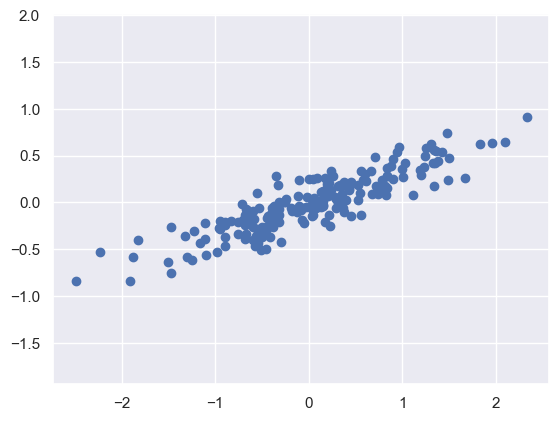

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]
original shape:    (200, 2)
transformed shape: (200, 1)


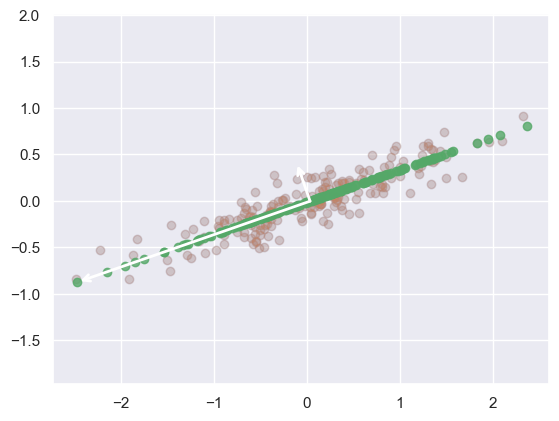

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

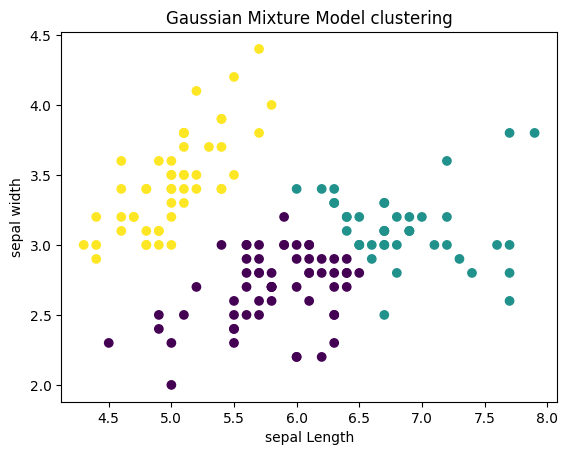

In [6]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load irisdataset
iris = load_iris()
X = iris.data[:,:2] # using only sepal length and sepal width

# Fit GMM with 3 components(clusters)
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Predict the labels(cluster assignments)
labels = gmm.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:,1],c=labels, cmap='viridis')
plt.xlabel('sepal Length')
plt.ylabel('sepal width')
plt.title('Gaussian Mixture Model clustering')
plt.show()

In [8]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
iris = datasets.load_iris()

data_y =  pd.DataFrame(iris.target)
data_y.columns = ['origianl label']

data_X = pd.DataFrame(iris.data)
data_X.columns =['Sepal length','Sepal width','Petal length','Petal width']

train = pd.concat([data_X,data_y],axis=1)

train.head()

,Sepal length,Sepal width,Petal length,Petal width,origianl label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


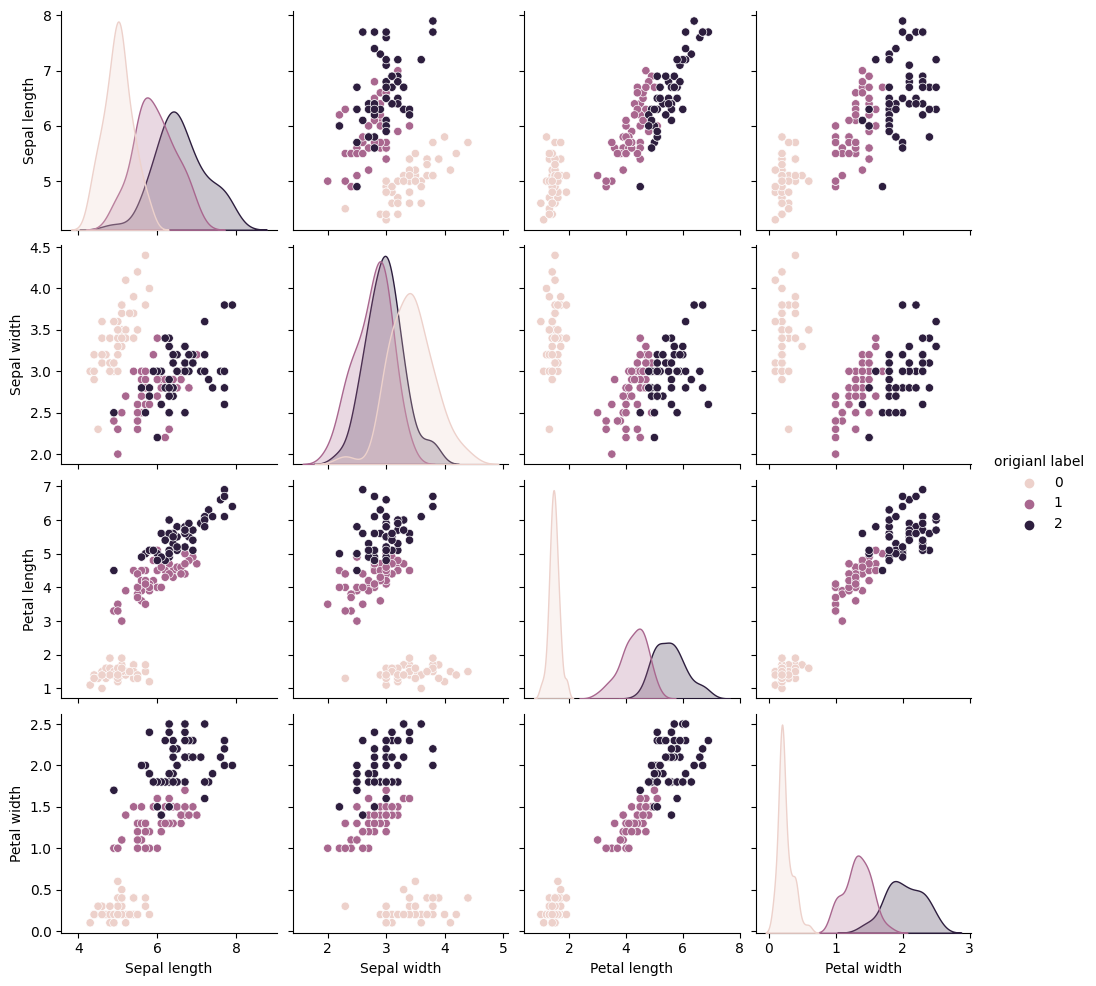

In [11]:
sns.color_palette("pastel")
sns.pairplot(train,hue='origianl label')

plt.show()

     Sepal length  Sepal width  Petal length  Petal width  pred_label
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           1
146           6.3          2.5           5.0          1.9           1
147           6.5          3.0           5.2          2.0           1
148           6.2          3.4           5.4          2.3           1
149           5.9          3.0           5.1          1.8           1

[150 rows x 5 columns]


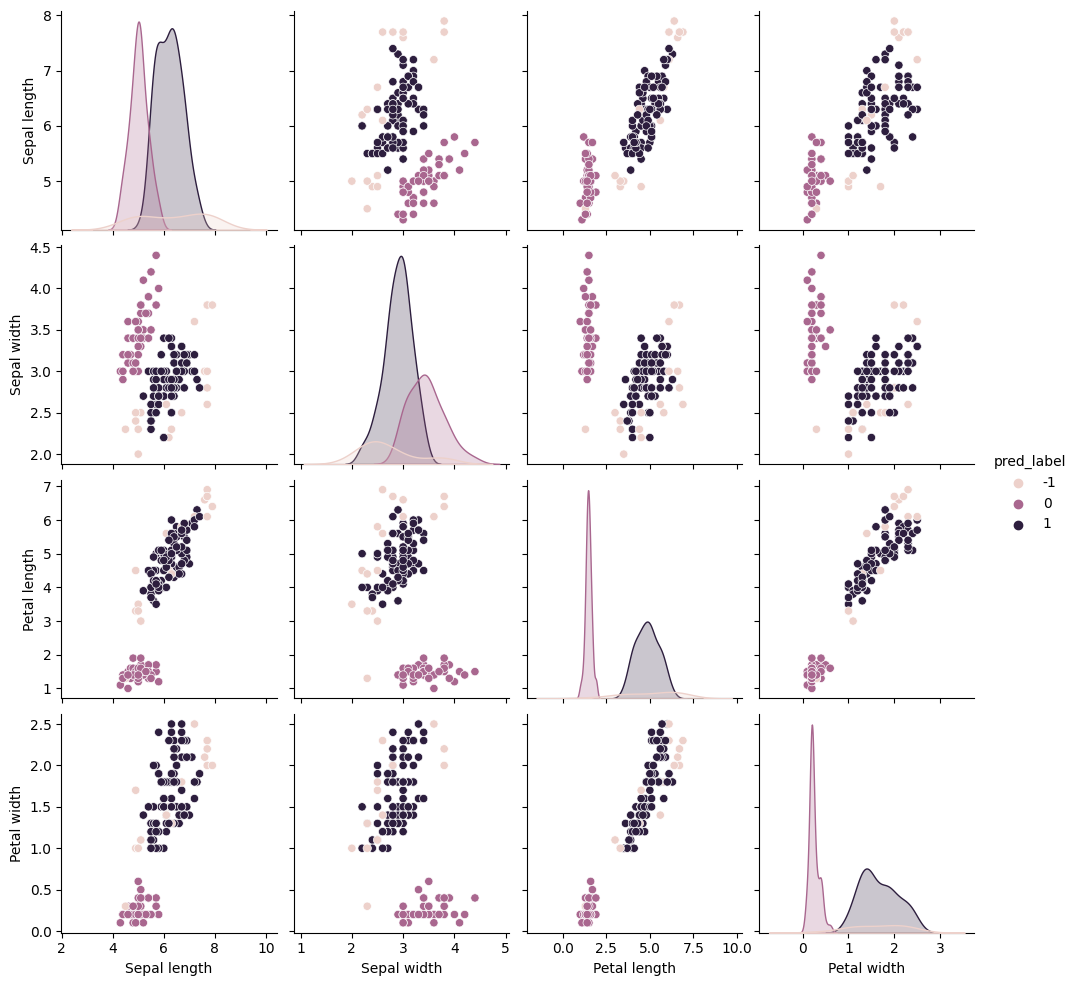

In [16]:
TRAIN_LABEL_COL = "origianl label" 
TRAIN_FEATURES = [col for col in train.columns if col != TRAIN_LABEL_COL]
X= train[TRAIN_FEATURES]
y= train[TRAIN_LABEL_COL]

dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(X)

y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([X,y_pred_df],axis=1)

print(val)

sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()